##플로이드 알고리즘

모든쌍최단경로

- 시간복잡도: O(n^3), n은 점의 수

**의사코드**

입력: 2차원 배열 D, 단 D[i j] = 간선 (i, j)의 가중치, 만약 간선(i, j)가 없으면 D[i, j] = inf, 모든 i에 대해 D[i, j] = 0

출력: 모든 쌍 최단 경로의 거리를 저장한 배열 D

    for k = 1 to n
        for i = 1 to n (i != k)
            for j = 1 to n (j != k, j != i)
                D[i, j] = min{D[i, k] + D[k, j], D[i, j]}

In [ ]:
import numpy as np

INF = 100
N = 6

def floyd(graph):
    for k in range(1, N):
        for i in range(1, N):
            for j in range(1, N):
                if graph[i][k] + graph[k][j] < graph[i][j]:
                    graph[i][j] = graph[i][k] + graph[k][j]
        print('k ==', k)
        print(graph)

In [ ]:
graph = [[0, 1, 2, 3, 4, 5],
         [1, 0, 4, 2, 5, INF],
         [2, INF, 0, 1, INF, 4],
         [3, 1, 3, 0, 1, 2],
         [4, -2, INF, INF, 0, 2],
         [5, INF, -3, 3, 1, 0]]
graph = np.array(graph)
graph.shape

(6, 6)

In [ ]:
graph

array([[  0,   1,   2,   3,   4,   5],
       [  1,   0,   4,   2,   5, 100],
       [  2, 100,   0,   1, 100,   4],
       [  3,   1,   3,   0,   1,   2],
       [  4,  -2, 100, 100,   0,   2],
       [  5, 100,  -3,   3,   1,   0]])

In [ ]:
floyd(graph)

k == 1
[[  0   1   2   3   4   5]
 [  1   0   4   2   5 100]
 [  2 100   0   1 100   4]
 [  3   1   3   0   1   2]
 [  4  -2   2   0   0   2]
 [  5 100  -3   3   1   0]]
k == 2
[[  0   1   2   3   4   5]
 [  1   0   4   2   5   8]
 [  2 100   0   1 100   4]
 [  3   1   3   0   1   2]
 [  4  -2   2   0   0   2]
 [  5  97  -3  -2   1   0]]
k == 3
[[ 0  1  2  3  4  5]
 [ 1  0  4  2  3  4]
 [ 2  2  0  1  2  3]
 [ 3  1  3  0  1  2]
 [ 4 -2  2  0  0  2]
 [ 5 -1 -3 -2 -1  0]]
k == 4
[[ 0  1  2  3  4  5]
 [ 1  0  4  2  3  4]
 [ 2  0  0  1  2  3]
 [ 3 -1  3  0  1  2]
 [ 4 -2  2  0  0  2]
 [ 5 -3 -3 -2 -1  0]]
k == 5
[[ 0  1  2  3  4  5]
 [ 1  0  1  2  3  4]
 [ 2  0  0  1  2  3]
 [ 3 -1 -1  0  1  2]
 [ 4 -2 -1  0  0  2]
 [ 5 -3 -3 -2 -1  0]]


##연속 행렬 곱셈

: 연속된 행렬 곱셈에 필요한 원소 간의 최소 곱셈 횟수를 찾는 문제

- 연속된 행렬 곱의 경우 결합 법칙 허용
    - AxBxC = (AxB)xC = Ax(BxC)

**의사코드**

입력: 연속된 행렬 A1xA2x...xAn, 단, A1은 d0xd1, A2 = d1xd2, ..., An = dn-1xdn

출력: 입력의 행렬 곱셈에 필요한 원소의 최소 곱셈 횟수

    for i = 1 to n
        C[i, j] = 0
    for L = 1 to n-1 #L은 부분 문제의 크기를 조절하는 인덱스
        for i = 1 to n-L
            j = i + L
            C[i, j] = inf
            for k = i to j-1
                temp = C[i, k] + C[k+1, j] + di-1dkdj
                if (temp < C[i, j])
                    C[i, j] = temp
    return C[1, n]

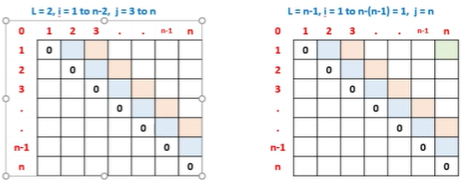

In [ ]:
def matrixChain(C, D):
    for L in range(1, N-1):
        for i in range(1, N-L):
            j = i+L
            C[i][j] = INF
            for k in range(i, j):
                temp = C[i][k] + C[k+1][j] + D[i-1]*D[k]*D[j]
                if temp < C[i][j]:
                    C[i][j] = temp
        print('L =', L)
        print(C)

In [ ]:
print([i for i in range(1, 10)])

[1, 2, 3, 4, 5, 6, 7, 8, 9]


In [ ]:
N = 5
INF = 1000000

D = np.array([10, 20, 5, 15, 30])
C = np.zeros((N, N))

matrixChain(C, D)

L = 1
[[   0.    0.    0.    0.    0.]
 [   0.    0. 1000.    0.    0.]
 [   0.    0.    0. 1500.    0.]
 [   0.    0.    0.    0. 2250.]
 [   0.    0.    0.    0.    0.]]
L = 2
[[   0.    0.    0.    0.    0.]
 [   0.    0. 1000. 1750.    0.]
 [   0.    0.    0. 1500. 5250.]
 [   0.    0.    0.    0. 2250.]
 [   0.    0.    0.    0.    0.]]
L = 3
[[   0.    0.    0.    0.    0.]
 [   0.    0. 1000. 1750. 4750.]
 [   0.    0.    0. 1500. 5250.]
 [   0.    0.    0.    0. 2250.]
 [   0.    0.    0.    0.    0.]]


##편집 거리 문제

: 삽입, 삭제, 대체 연산을 사용해 스트링 s를 다른 스트링 t로 변환하고자 할 때 필요한 최소 편집 연산 횟수

- 시간복잡도 O(mn)

'strong' -> 'stone'

-> o 삽입, r 삭제, o 삭제, g->e 대체: 4회

- |S| = m, |T| = n
- S = s1s2s3s4...sm
- T = t1t2t3t4...tn
- E[i, j] = S의 처음 i개 문자를 T의 처음 j개 문자로 바꾸는데 필요한 편집 거리

행 이동: 삭제 / 
열 이동: 삽입 / 
대각선: 대체

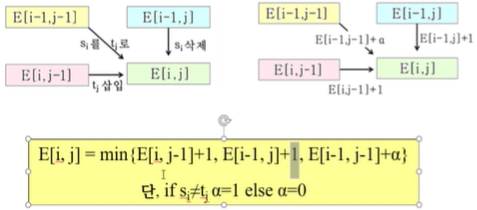

**의사코드**

입력: 스트링 S, T, 단, S와 T의 길이는 각각 m, n
출력: S를 T로 변환하는 편집 거리, E[m, n]

    for i = 0 to m 
        E[i, 0] = i
    for j = 0 to n 
        E[0, j] = j
    for i = 1 to m
        for j = 1 to n
            E[i, j] = min{E[i, j-1] +1, E[i-1, j]+ E[i-1, j-1]+a}
    return E[m, n]

In [ ]:
def editDistance(S, T, m, n):
    E = [[N for i in range(n+1)] for i in range(m+1)]
    for j in range(n+1):
        E[0][j] = j
    for i in range(m+1):
        E[i][0] = i

    for i in range(1, m+1):
        for j in range(1, n+1):
            if S[i-1] == T[j-1]:
                E[i][j] = E[i-1][j-1]
            else:
                E[i][j] = min(E[i][j-1], E[i-1][j], E[i-1][j-1]) + 1
        for e in E:
            print(e)
        print('--'*6)

In [ ]:
S = 'STRONG '   #파이썬에선 마지막 문자 공백으로 처리해주기...
T = 'STONE '
N = 100
editDistance(S, T, len(S), len(T))

[0, 1, 2, 3, 4, 5, 6]
[1, 0, 1, 2, 3, 4, 5]
[2, 100, 100, 100, 100, 100, 100]
[3, 100, 100, 100, 100, 100, 100]
[4, 100, 100, 100, 100, 100, 100]
[5, 100, 100, 100, 100, 100, 100]
[6, 100, 100, 100, 100, 100, 100]
[7, 100, 100, 100, 100, 100, 100]
------------
[0, 1, 2, 3, 4, 5, 6]
[1, 0, 1, 2, 3, 4, 5]
[2, 1, 0, 1, 2, 3, 4]
[3, 100, 100, 100, 100, 100, 100]
[4, 100, 100, 100, 100, 100, 100]
[5, 100, 100, 100, 100, 100, 100]
[6, 100, 100, 100, 100, 100, 100]
[7, 100, 100, 100, 100, 100, 100]
------------
[0, 1, 2, 3, 4, 5, 6]
[1, 0, 1, 2, 3, 4, 5]
[2, 1, 0, 1, 2, 3, 4]
[3, 2, 1, 1, 2, 3, 4]
[4, 100, 100, 100, 100, 100, 100]
[5, 100, 100, 100, 100, 100, 100]
[6, 100, 100, 100, 100, 100, 100]
[7, 100, 100, 100, 100, 100, 100]
------------
[0, 1, 2, 3, 4, 5, 6]
[1, 0, 1, 2, 3, 4, 5]
[2, 1, 0, 1, 2, 3, 4]
[3, 2, 1, 1, 2, 3, 4]
[4, 3, 2, 1, 2, 3, 4]
[5, 100, 100, 100, 100, 100, 100]
[6, 100, 100, 100, 100, 100, 100]
[7, 100, 100, 100, 100, 100, 100]
------------
[0, 1, 2, 3, 4, 5, 6]
[1, 0,